# Make All Figures for Main Manuscript

Kendra Wyant  
2025-03-16

In [ ]:
#| message: false
#| warning: false

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true"))
suppressPackageStartupMessages(library(tidyposterior))
library(kableExtra, exclude = "group_rows")
library(patchwork)

theme_set(theme_classic())

path_models_lag <- "/Volumes/private/studydata/risk/models/lag"
path_shared <- "/Volumes/private/studydata/risk/data_processed/shared"
path_processed <- "/Volumes/private/studydata/risk/data_processed/shared"

Data for figures

In [ ]:
pp_tidy <- read_csv(here::here(path_models_lag, "posteriors.csv"), 
                                 show_col_types = FALSE) 

ci <- read_csv(here::here(path_models_lag, "pp_perf_tibble.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(model = factor(model, levels = c("0 lag", "24 lag", "72 lag", "168 lag", "336 lag"),
                        labels = c("No lag", "1 day", "3 days", "1 week", "2 weeks")))

global_all <- read_rds(here::here(path_models_lag, "shap_global_all.rds")) |> 
   filter(str_detect(variable_grp, "EMA")) |> 
   mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
          variable_grp = reorder(variable_grp, mean_value, sum),
          model = factor(model, levels = c("336 lag", "168 lag", "72 lag", "24 lag", "0 lag"),
                         labels = c("2 weeks", "1 week", "3 days", "1 day", "No lag" ))) |> 
  filter(model %in% c("2 weeks", "No lag"))

shap_levels <- global_all |>
  mutate(variable_grp = reorder(variable_grp, mean_value, sum)) |>
  pull(variable_grp) |>
  levels()

pp_tidy_dem <- read_csv(here::here(path_models_lag, "posteriors_dem.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(lag = factor(lag, levels = c(0, 336),
                        labels = c("No lag", "2 weeks")),
         model = factor(model)) |> 
  mutate(group = case_when(model %in% c("female", "male") ~ "Sex (female, male)",
                           model %in% c("not white", "non-hispanic white") ~ "Race (not White, White)",
                           model %in% c("below poverty", "above poverty") ~ "Income (below poverty, above poverty)")) |> 
  filter(!is.na(lag))

ci_dem <- read_csv(here::here(path_models_lag, "pp_dem_all.csv"), 
                                 show_col_types = FALSE) |> 
  mutate(lag = factor(lag, levels = c(0, 336),
                        labels = c("No lag", "2 weeks")),
         model = factor(model)) |> 
  mutate(group = case_when(model %in% c("female", "male") ~ "Sex (female, male)",
                           model %in% c("not white", "non-hispanic white") ~ "Race (not White, White)",
                           model %in% c("below poverty", "above poverty") ~ "Income (below poverty, above poverty)")) |> 
  filter(!is.na(lag))

## Figure 2: Posterior probabilities for auROC by model

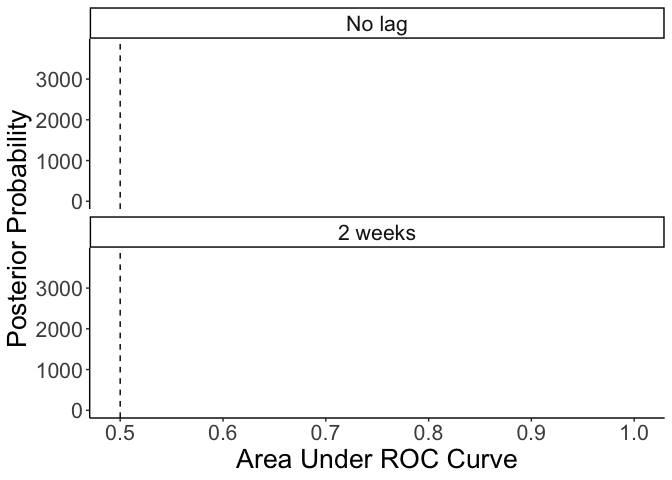

In [ ]:
#| label: pp-none
#| out-width: 15in
#| out-height: 8in

pp_tidy |> 
  mutate(model = factor(model, levels = c("lag0", "lag24", "lag72", "lag168", "lag336"),
                        labels = c("No lag", "1 day", "3 days", "1 week", "2 weeks"))) |>
  filter(model %in% c("No lag", "2 weeks")) |> 
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model, color = model), linewidth = .5,  
                 bins = 60) +
  geom_segment(mapping = aes(y = 3400, yend = 3800, x = pp_median, xend = pp_median),
               color = "white", linewidth = .5, data = ci |>  filter(model %in% c("No lag")) ) +
  geom_segment(mapping = aes(y = 3600, yend = 3600, x = pp_lower, xend = pp_upper),
                color = "white", linewidth = .5, data = ci |>  filter(model %in% c("No lag")) ) +
  facet_wrap(~model, ncol = 1) +
  geom_vline(xintercept = .5, linewidth = .5, linetype = "dashed") +
  scale_y_continuous("Posterior Probability") +
  scale_fill_manual(values = c("white", "white")) +
  scale_color_manual(values = c("white", "white")) +
  xlab("Area Under ROC Curve") +
  expand_limits(x = c(.5, 1)) +
  theme_classic() +
  theme(legend.position = "none",
        text = element_text(size = 20))

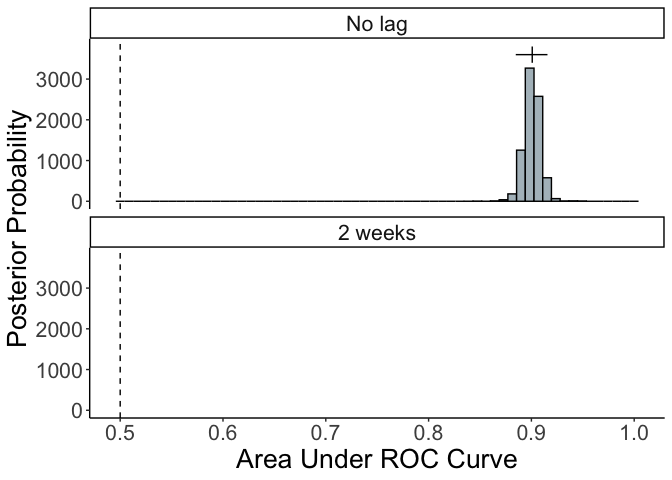

In [ ]:
#| label: pp-nolag
#| out-width: 15in
#| out-height: 8in

pp_tidy |> 
  mutate(model = factor(model, levels = c("lag0", "lag24", "lag72", "lag168", "lag336"),
                        labels = c("No lag", "1 day", "3 days", "1 week", "2 weeks"))) |>
  filter(model %in% c("No lag", "2 weeks")) |> 
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model, color = model), linewidth = .5,  
                 bins = 60) +
  geom_segment(mapping = aes(y = 3400, yend = 3800, x = pp_median, xend = pp_median),
               linewidth = .5, data = ci |>  filter(model %in% c("No lag")) ) +
  geom_segment(mapping = aes(y = 3600, yend = 3600, x = pp_lower, xend = pp_upper),
                linewidth = .5, data = ci |>  filter(model %in% c("No lag")) ) +
  facet_wrap(~model, ncol = 1) +
  geom_vline(xintercept = .5, linewidth = .5, linetype = "dashed") +
  scale_y_continuous("Posterior Probability") +
  scale_fill_manual(values = c("#b0bec5", "white")) +
  scale_color_manual(values = c("black", "white")) +
  xlab("Area Under ROC Curve") +
  expand_limits(x = c(.5, 1)) +
  theme_classic() +
  theme(legend.position = "none",
        text = element_text(size = 20))

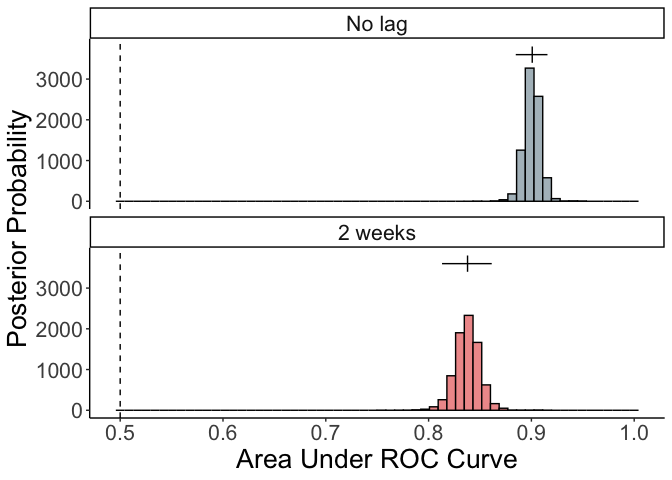

In [ ]:
#| label: pp
#| out-width: 10in
#| out-height: 8in

pp_tidy |> 
  mutate(model = factor(model, levels = c("lag0", "lag24", "lag72", "lag168", "lag336"),
                        labels = c("No lag", "1 day", "3 days", "1 week", "2 weeks"))) |>
  filter(model %in% c("No lag", "2 weeks")) |> 
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model), color = "black", linewidth = .5,  
                 bins = 60) +
  geom_segment(mapping = aes(y = 3400, yend = 3800, x = pp_median, xend = pp_median),
               linewidth = .5, data = ci |>  filter(model %in% c("No lag", "2 weeks")) ) +
  geom_segment(mapping = aes(y = 3600, yend = 3600, x = pp_lower, xend = pp_upper),
                linewidth = .5, data = ci |>  filter(model %in% c("No lag", "2 weeks")) ) +
  facet_wrap(~model, ncol = 1) +
  geom_vline(xintercept = .5, linewidth = .5, linetype = "dashed") +
  scale_y_continuous("Posterior Probability") +
  scale_fill_manual(values = c("#b0bec5", "#ef9a9a")) +
  xlab("Area Under ROC Curve") +
  expand_limits(x = c(.5, 1)) +
  theme_classic() +
  theme(legend.position = "none",
        text = element_text(size = 20))

## Figure 3: Global and Local Shapley Plots

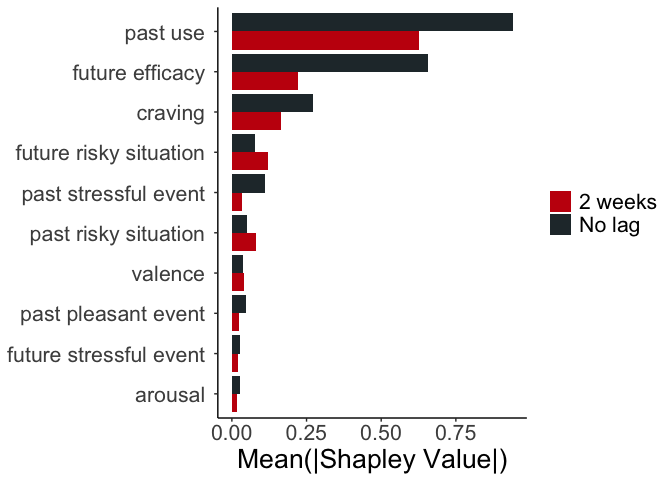

In [ ]:
#| label: global
#| out-width: 15in
#| out-height: 8in
global_all |>
  ggplot() +
  geom_bar(aes(x = variable_grp, y = mean_value, fill = model), 
           stat = "identity", position = "dodge") +
  labs(y = "Mean(|Shapley Value|)",
       x = NULL,
       fill = NULL) +
  scale_fill_manual(values = c("#c5050c", "#263238")) +
  theme(text = element_text(size = 20),
        legend.position = "right") +
  coord_flip()

In [ ]:
shap_feat_0 <- read_rds(here::here(path_models_lag, 
                                   "outer_shapsgrp_1day_0_v3_nested_main.rds")) |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         variable_grp = factor(variable_grp, levels = shap_levels)) |> 
  group_by(variable_grp) |> 
  summarize(min(value), max(value)) |> 
  mutate(model = "No lag")

shap_feat_336 <- read_rds(here::here(path_models_lag, 
                                     "outer_shapsgrp_1day_336_v3_nested_main.rds")) |> 
  filter(str_detect(variable_grp, "EMA")) |> 
  mutate(variable_grp = str_remove(variable_grp, "\\(EMA item\\)"),
         variable_grp = factor(variable_grp, levels = shap_levels))  |> 
  group_by(variable_grp) |> 
  summarize(min(value), max(value)) |> 
  mutate(model = "2 weeks")

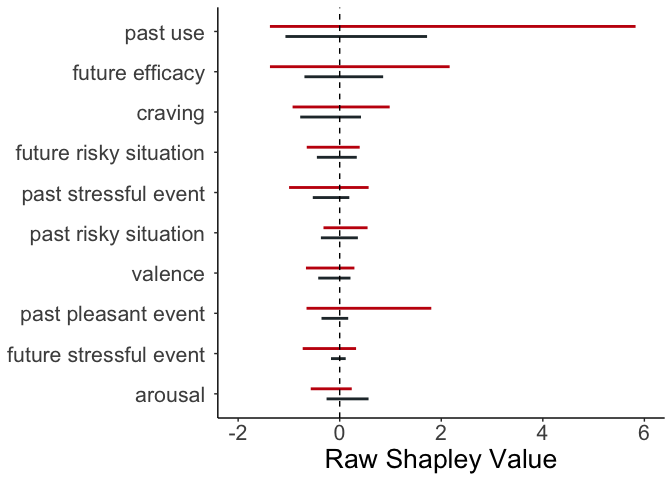

In [ ]:
#| label: local
#| out-width: 10in
#| out-height: 8in

shap_feat_0 |>
  bind_rows(shap_feat_336) |> 
  mutate(model = factor(model, levels = c("2 weeks", "No lag"))) |> 
  rename(min = `min(value)`,
         max = `max(value)`) |> 
  ggplot() +
  geom_segment(aes(x = variable_grp, y = min, yend = max, group = model,
                   color = model),
               position = position_dodge(width = .5), 
               linewidth = 1) +
  ylab("Raw Shapley Value") +
  xlab(NULL) +
  labs(color = NULL) +
  scale_color_manual(values = c("#263238", "#c5050c")) +
  theme(legend.position = "none",
       text = element_text(size = 20))+
  geom_hline(aes(yintercept = 0), linetype = "dashed",
             linewidth = .5) +
  scale_y_continuous(limits = c(-2, 6), breaks = seq(-2, 6, 2)) +
  coord_flip()

### Fairness

sex

In [ ]:
sex_no_lag <- pp_tidy_dem |>
  filter(lag == "No lag") |> 
  filter(str_detect(group, "Sex")) |> 
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model), color = "black", linewidth = .5,  
                 bins = 60, fill = "#b0bec5") +
  geom_segment(mapping = aes(y = 3400, yend = 3800, x = pp_median, xend = pp_median),
               linewidth = .5, data = ci_dem |> filter(str_detect(group, "Sex") & lag == "No lag") ) +
  geom_segment(mapping = aes(y = 3600, yend = 3600, x = pp_lower, xend = pp_upper),
                linewidth = .5, data = ci_dem |> filter(str_detect(group, "Sex") & lag == "No lag")  ) +
  facet_grid(model~group) +
  geom_vline(xintercept = .5, linewidth = .5, linetype = "dashed") +
  scale_y_continuous("Posterior Probability") +
  xlab(NULL) +
  expand_limits(x = c(.5, 1)) +
  theme_classic() +
  theme(legend.position = "none",
        text = element_text(size = 20),
        strip.text.y = element_blank())

sex_lag <- pp_tidy_dem |>
  filter(lag == "2 weeks") |> 
  filter(str_detect(group, "Sex")) |>
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model), color = "black", linewidth = .5,  
                 bins = 60, fill = "#ef9a9a") +
  geom_segment(mapping = aes(y = 3400, yend = 3800, x = pp_median, xend = pp_median),
               linewidth = .5, data = ci_dem |> filter(str_detect(group, "Sex") & lag == "2 weeks") ) +
  geom_segment(mapping = aes(y = 3600, yend = 3600, x = pp_lower, xend = pp_upper),
                linewidth = .5, data = ci_dem |> filter(str_detect(group, "Sex") & lag == "2 weeks")  ) +
  facet_grid(model~group) +
  geom_vline(xintercept = .5, linewidth = .5, linetype = "dashed") +
  scale_y_continuous("Posterior Probability") +
  xlab(NULL) +
  expand_limits(x = c(.5, 1)) +
  theme_classic() +
  theme(legend.position = "none",
        text = element_text(size = 20),
        strip.text.y = element_blank())

race

In [ ]:
race_no_lag <- pp_tidy_dem |>
  filter(lag == "No lag") |> 
  filter(str_detect(group, "Race")) |> 
    mutate(model = factor(model, levels = c("not white", "non-hispanic white"))) |> 
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model), color = "black", linewidth = .5,  
                 bins = 60, fill = "#b0bec5") +
  geom_segment(mapping = aes(y = 3400, yend = 3800, x = pp_median, xend = pp_median),
               linewidth = .5, data = ci_dem |> filter(str_detect(group, "Race") & lag == "No lag") |> 
                  mutate(model = factor(model, levels = c("not white", "non-hispanic white"))) ) +
  geom_segment(mapping = aes(y = 3600, yend = 3600, x = pp_lower, xend = pp_upper),
                linewidth = .5, data = ci_dem |> filter(str_detect(group, "Race") & lag == "No lag")  |> 
                  mutate(model = factor(model, levels = c("not white", "non-hispanic white"))) ) +
  facet_grid(model~group) +
  geom_vline(xintercept = .5, linewidth = .5, linetype = "dashed") +
  scale_y_continuous(NULL) +
  xlab("Area Under ROC Curve") +
  expand_limits(x = c(.5, 1)) +
  theme_classic() +
  theme(legend.position = "none",
        text = element_text(size = 20),
        strip.text.y = element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line.y = element_blank())

race_lag <- pp_tidy_dem |>
  filter(lag == "2 weeks") |> 
  filter(str_detect(group, "Race")) |> 
    mutate(model = factor(model, levels = c("not white", "non-hispanic white"))) |> 
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model), color = "black", linewidth = .5,  
                 bins = 60, fill = "#ef9a9a") +
  geom_segment(mapping = aes(y = 3400, yend = 3800, x = pp_median, xend = pp_median),
               linewidth = .5, data = ci_dem |> filter(str_detect(group, "Race") & lag == "2 weeks") |> 
                  mutate(model = factor(model, levels = c("not white", "non-hispanic white"))) ) +
  geom_segment(mapping = aes(y = 3600, yend = 3600, x = pp_lower, xend = pp_upper),
                linewidth = .5, data = ci_dem |> filter(str_detect(group, "Race") & lag == "2 weeks")  |> 
                  mutate(model = factor(model, levels = c("not white", "non-hispanic white"))) ) +
  facet_grid(model~group) +
  geom_vline(xintercept = .5, linewidth = .5, linetype = "dashed") +
  scale_y_continuous(NULL) +
  xlab("Area Under ROC Curve") +
  expand_limits(x = c(.5, 1)) +
  theme_classic() +
  theme(legend.position = "none",
        text = element_text(size = 20),
        strip.text.y = element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line.y = element_blank())

income

In [ ]:
income_no_lag <- pp_tidy_dem |>
  filter(lag == "No lag") |> 
  filter(str_detect(group, "Income")) |> 
    mutate(model = factor(model, levels = c("below poverty", "above poverty"))) |> 
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model), color = "black", linewidth = .5,  
                 bins = 60, fill = "#b0bec5") +
  geom_segment(mapping = aes(y = 3400, yend = 3800, x = pp_median, xend = pp_median),
               linewidth = .5, data = ci_dem |> filter(str_detect(group, "Income") & lag == "No lag") |> 
                  mutate(model = factor(model, levels = c("below poverty", "above poverty"))) ) +
  geom_segment(mapping = aes(y = 3600, yend = 3600, x = pp_lower, xend = pp_upper),
                linewidth = .5, data = ci_dem |> filter(str_detect(group, "Income") & lag == "No lag")  |> 
                  mutate(model = factor(model, levels = c("below poverty", "above poverty"))) ) +
  facet_grid(model~group) +
  geom_vline(xintercept = .5, linewidth = .5, linetype = "dashed") +
  scale_y_continuous(NULL) +
  xlab(NULL) +
  expand_limits(x = c(.5, 1)) +
  theme_classic() +
  theme(legend.position = "none",
        text = element_text(size = 20),
        strip.text.y = element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line.y = element_blank())

income_lag <- pp_tidy_dem |>
  filter(lag == "2 weeks") |> 
   filter(str_detect(group, "Income")) |> 
    mutate(model = factor(model, levels = c("below poverty", "above poverty"))) |> 
  ggplot() + 
  geom_histogram(aes(x = posterior, fill = model), color = "black", linewidth = .5,  
                 bins = 60, fill = "#ef9a9a") +
  geom_segment(mapping = aes(y = 3400, yend = 3800, x = pp_median, xend = pp_median),
               linewidth = .5, data = ci_dem |> filter(str_detect(group, "Income") & lag == "2 weeks") |> 
                  mutate(model = factor(model, levels = c("below poverty", "above poverty"))) ) +
  geom_segment(mapping = aes(y = 3600, yend = 3600, x = pp_lower, xend = pp_upper),
                linewidth = .5, data = ci_dem |> filter(str_detect(group, "Income") & lag == "2 weeks")  |> 
                  mutate(model = factor(model, levels = c("below poverty", "above poverty"))) ) +
  facet_grid(model~group) +
  geom_vline(xintercept = .5, linewidth = .5, linetype = "dashed") +
  scale_y_continuous(NULL) +
  xlab(NULL) +
  expand_limits(x = c(.5, 1)) +
  theme_classic() +
  theme(legend.position = "none",
        text = element_text(size = 20),
        strip.text.y = element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        axis.line.y = element_blank())

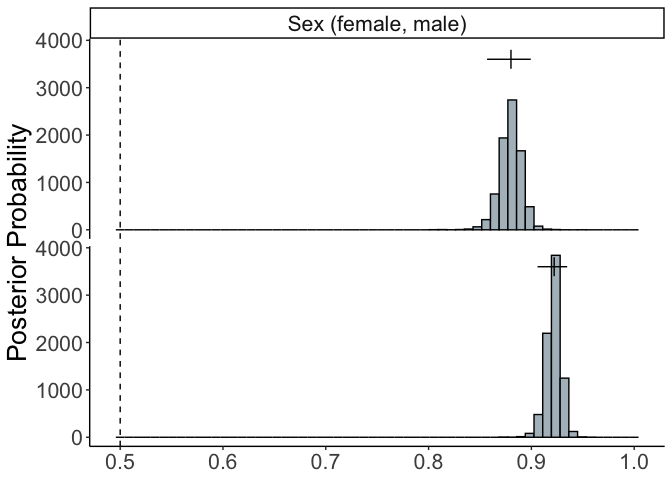

In [ ]:
#| label: pp-dem-no-lag-sex
#| out-width: 8in
#| out-height: 20in

sex_no_lag

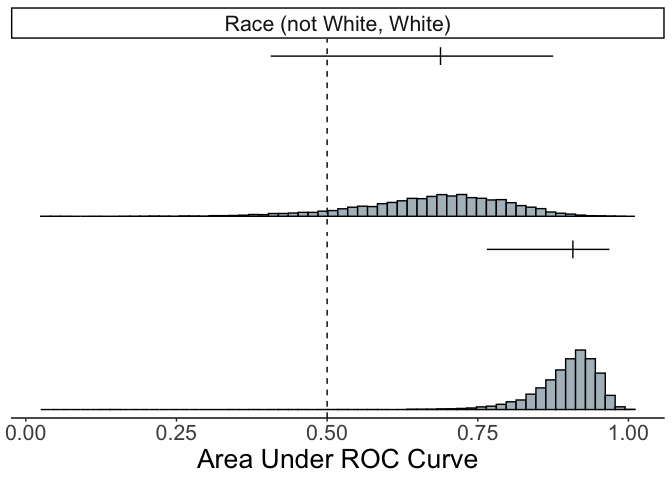

In [ ]:
#| label: pp-dem-no-lag-race
#| out-width: 8in
#| out-height: 23in

race_no_lag

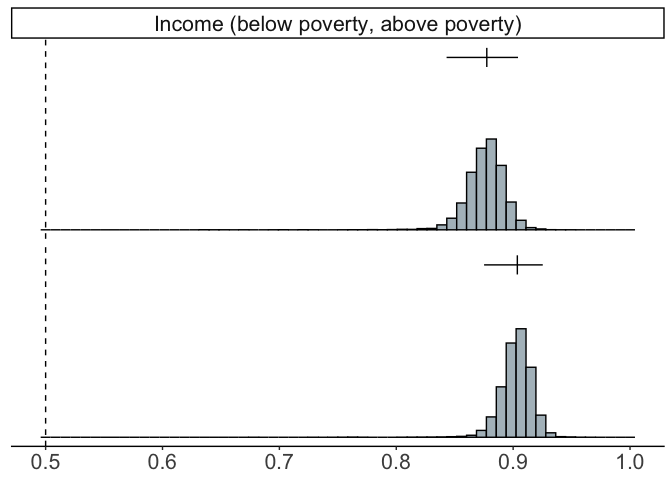

In [ ]:
#| label: pp-dem-no-lag-income
#| out-width: 8in
#| out-height: 20in

income_no_lag

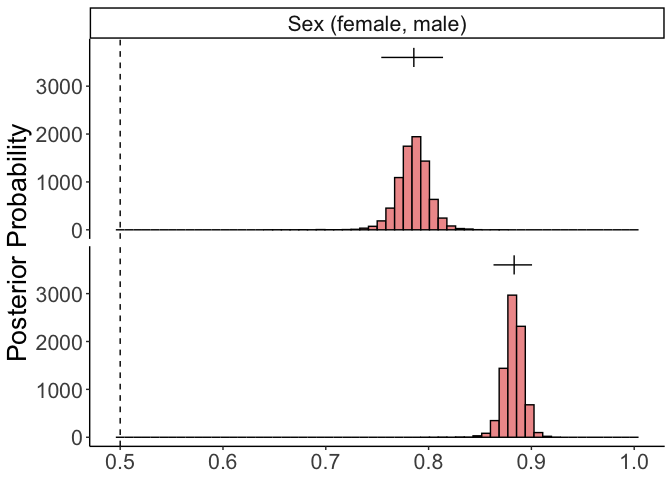

In [ ]:
#| label: pp-dem-lag-sex
#| out-width: 8in
#| out-height: 20in

sex_lag

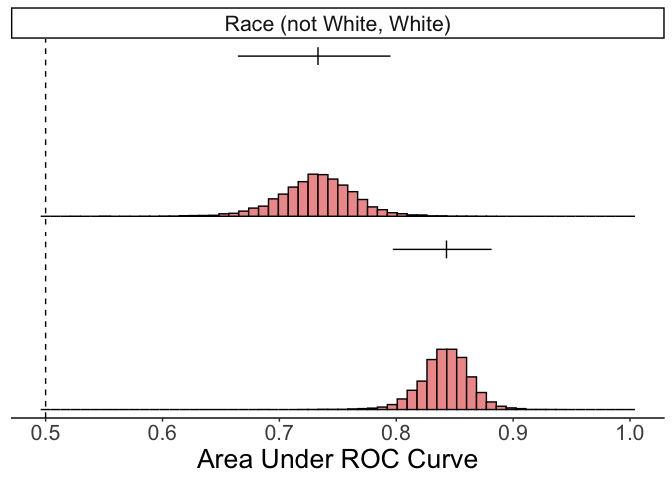

In [ ]:
#| label: pp-dem-lag-race
#| out-width: 8in
#| out-height: 23in

race_lag

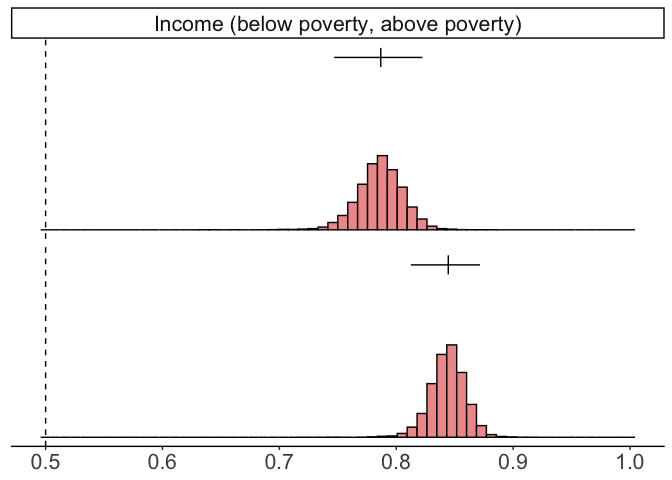

In [ ]:
#| label: pp-dem-lag-income
#| out-width: 8in
#| out-height: 20in

income_lag